<a href="https://colab.research.google.com/github/WillxGan/Personal-Projects/blob/main/bayesian_analysis_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Bayesian Machine Learning Mini Project: Naive Bayes Classifier
Welcome to your hands-on project for the Bayesian Analysis & Machine Learning Workshop!

In this notebook, you'll:
1. Review Bayes’ Theorem
2. Build a Naive Bayes classifier from scratch
3. Train it on real data (Spam vs. Ham emails)
4. Evaluate its performance
5. Try your own predictions

Please make a copy of this notebook!!!

In [ ]:
# Setup

# Install and import libraries
!pip install scikit-learn pandas matplotlib --quiet

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


 Recall Bayes’ Theorem

Bayes’ theorem tells us how to update our belief about an event based on new evidence.

\[
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
\]

In Naive Bayes:
- \(A\) is the class (e.g., "spam" or "not spam")
- \(B\) is the observed data (e.g., words in the email)

We assume that features are **conditionally independent**, which makes it computationally simple.


In [ ]:
## Load the dataset

# We'll use a small dataset of SMS messages for simplicity.
# You can replace this with any text dataset (e.g., news, tweets, etc.)

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

print("Dataset preview:")
data.head()


Dataset preview:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
##  Preprocess the data

# Convert labels to numeric form
data['label_num'] = data['label'].map({'ham':0, 'spam':1})

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label_num'], test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 4457
Testing samples: 1115


In [ ]:
## Vectorize the text

# Convert text messages into a matrix of word counts
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
## Train Naive Bayes Classifier

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)


Accuracy: 0.9883408071748879

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



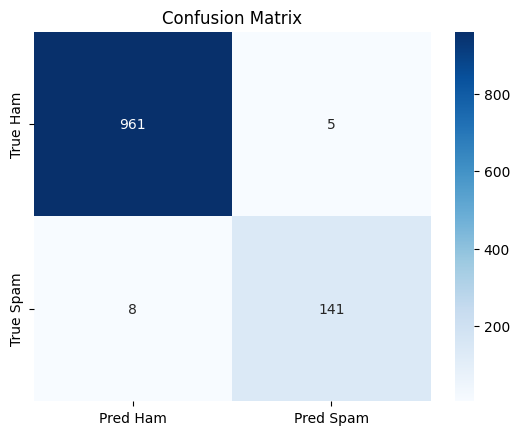

In [ ]:
## Evaluate performance

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['ham', 'spam']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Ham', 'Pred Spam'], yticklabels=['True Ham', 'True Spam'])
plt.title("Confusion Matrix")
plt.show()


In [ ]:

sample_messages = [
    "Win $1000 cash now!!! Click here!",
    "Hey, are we still meeting at 5?",
    "Congratulations! You’ve been selected for a free gift card.",
    "Can you send me the project file?"
]

sample_vec = vectorizer.transform(sample_messages)
preds = model.predict(sample_vec)

for msg, pred in zip(sample_messages, preds):
    label = "SPAM 🚨" if pred == 1 else "HAM ✅"
    print(f"{label}: {msg}")


SPAM 🚨: Win $1000 cash now!!! Click here!
HAM ✅: Hey, are we still meeting at 5?
SPAM 🚨: Congratulations! You’ve been selected for a free gift card.
HAM ✅: Can you send me the project file?
